In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
review = pd.read_csv('../data/olist_order_reviews_dataset.csv')

In [3]:
print(review.shape)
review = review[~review['review_comment_message'].isna()]
print(review.shape)

(100000, 7)
(41753, 7)


In [10]:
review.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       31767
review_comment_message         0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [9]:
len(review[~review['review_score'].isna()])

41753

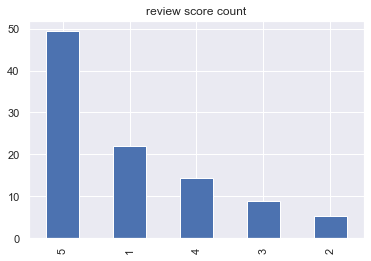

In [14]:
_ = (review['review_score'].value_counts(normalize=True)*100).plot(kind='bar')
_ = plt.title('review score count')

In [203]:
review.reset_index(drop=True,inplace=True)

In [204]:
# randomly check review comment message
rand_idx = np.random.randint(0,len(review),1)[0]
review.loc[rand_idx,'review_comment_message']

'Demorou demais'

In [205]:
# get rid of \r \n \t
import re

rand_idx = np.random.randint(0,len(review),1)[0]
print(review.loc[rand_idx,'review_comment_message'])
print(re.sub(r'[\r\n\t]','',review.loc[rand_idx,'review_comment_message']))

Produto com excelente qualidade. 
Produto com excelente qualidade. 


In [206]:
# get rid of punctuation
from string import punctuation as punc

In [207]:
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [208]:
punc_list = [p for p in punc]

In [210]:
# put it all tgt
def proc_text(txt):
    # lower
    txt = txt.lower()
    # remove escape char
    txt = re.sub(r'[\r\n\t]','',txt)
    # remove punctuation
    txt = ''.join([c for c in txt if not c in punc_list])
    return txt

In [211]:
review['review_comment_message_proc'] = review['review_comment_message'].apply(proc_text)
review['review_comment_message_token'] = review['review_comment_message_proc'].apply(lambda x: x.split(' '))

In [212]:
# making words cloud for each review score
review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_message_proc,review_comment_message_token
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,recebi bem antes do prazo estipulado,"[recebi, bem, antes, do, prazo, estipulado]"
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,parabéns lojas lannister adorei comprar pela i...,"[parabéns, lojas, lannister, adorei, comprar, ..."
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,aparelho eficiente no site a marca do aparelho...,"[aparelho, eficiente, no, site, a, marca, do, ..."
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,mas um pouco travandopelo valor ta boa,"[mas, um, pouco, travandopelo, valor, ta, boa]"
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,vendedor confiável produto ok e entrega antes ...,"[vendedor, confiável, produto, ok, e, entrega,..."


In [213]:
from wordcloud import WordCloud

In [223]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(10, 7))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

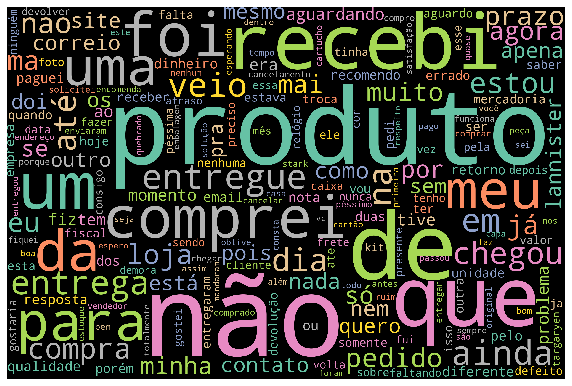

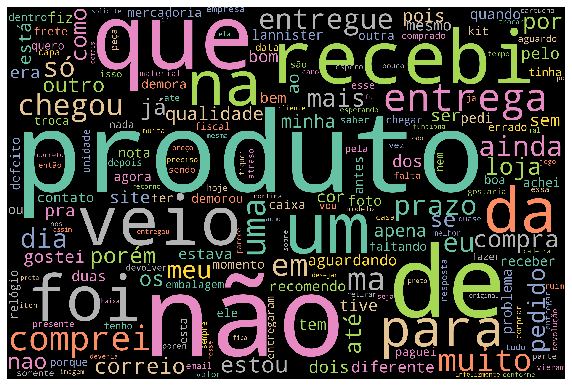

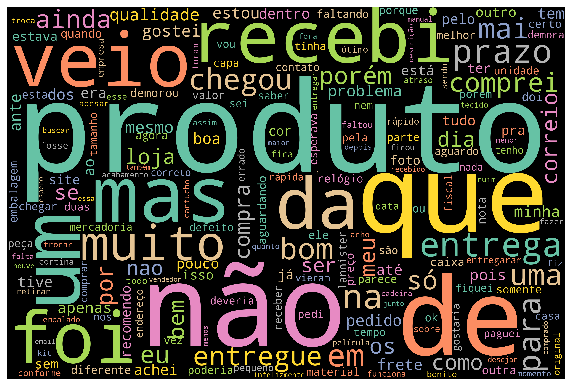

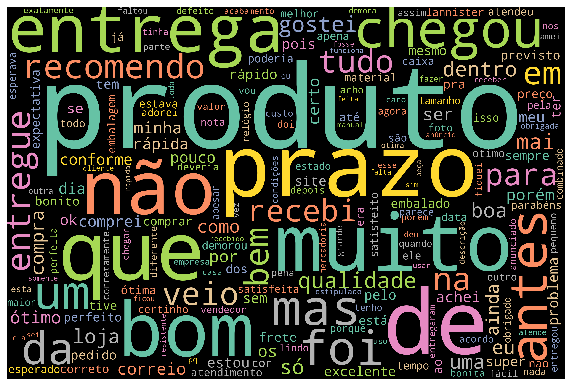

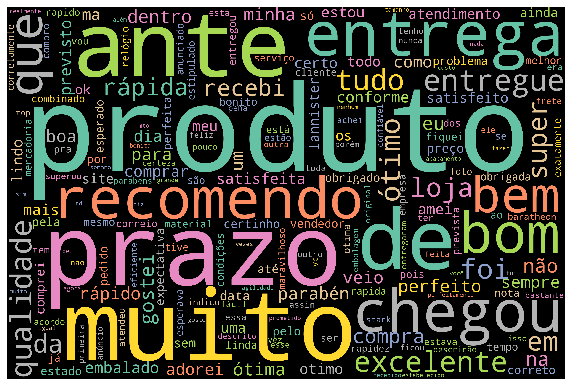

In [227]:
for i in range(1,6):
    concat_review_txt = ' '.join(review[review['review_score']==i]['review_comment_message_proc'].values.tolist())

    # Create and generate a word cloud image:
    wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='black', colormap='Set2',
        collocations=False,).generate(concat_review_txt)

    # Display the generated image:
    plot_cloud(wordcloud)

In [29]:
# Google Translation API

# import os
# import six
# os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'My Project-f67dbc86b9a5.json'

# from google.cloud import translate_v2 as translate

# translate_client = translate.Client()

# def translate_to_targ_lang(text, targ_lang, translate_client):
#     if isinstance(text, six.binary_type):
#         text = text.decode("utf-8")
#         result = translate_client.translate(text, target_language='en')['translatedText']
#     return result

# print(review.shape)
# review = review[~review['review_comment_message'].isna()]
# print(review.shape)

# (len(''.join(review['review_comment_message'].values.tolist())) - 500_000) / 1_000_000